# Training and Evaluation of MLP and DQN Models

This notebook implements training and evaluation of MLP and DQN models for permutation learning, followed by beam search.

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(notebook_dir)

In [2]:
import torch
import numpy as np
from src.models.mlp import PermutationMLP
from src.models.dqn import DQN, DQNAgent, ReplayBuffer
from src.models.mlp_trainer import MLPTrainer
from src.models.dqn_trainer import DQNTrainer
import matplotlib.pyplot as plt
from tqdm import tqdm

## Configuration

In [3]:
# Common configuration
n = 10  # Size of permutation
input_size = n * n  # One-hot encoded permutation size
hidden_sizes = [512]
batch_size = 32
learning_rate = 1e-4
weight_decay = 1e-5
n_epochs = 100

# DQN specific configuration
dqn_config = {
    'gamma': 0.99,
    'epsilon_start': 1.0,
    'epsilon_min': 0.01,
    'epsilon_decay': 0.995,
    'buffer_size': 10000,
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'hidden_sizes': hidden_sizes,
    'n_random_walks_to_generate': 1000
}

# MLP specific configuration
mlp_config = {
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'weight_decay': weight_decay,
    'hidden_sizes': hidden_sizes,
    'n_random_walks_to_generate': 1000
}

## Generate Training Data

In [4]:
def generate_random_permutation(n):
    return torch.randperm(n)

def generate_training_data(n_samples, n):
    X = []
    for _ in range(n_samples):
        perm = generate_random_permutation(n)
        X.append(perm)
    return torch.stack(X)

# Generate training data
n_samples = 10000
X_train = generate_training_data(n_samples, n)
print(f"Generated {len(X_train)} training samples")

Generated 10000 training samples


## Train MLP Model

Training MLP:  10%|█         | 10/100 [00:02<00:22,  3.93it/s]

Epoch 10, Loss: 0.0000


Training MLP:  20%|██        | 20/100 [00:05<00:20,  3.98it/s]

Epoch 20, Loss: 0.0000


Training MLP:  30%|███       | 30/100 [00:07<00:19,  3.66it/s]

Epoch 30, Loss: 0.0000


Training MLP:  40%|████      | 40/100 [00:10<00:16,  3.70it/s]

Epoch 40, Loss: 0.0000


Training MLP:  50%|█████     | 50/100 [00:13<00:13,  3.69it/s]

Epoch 50, Loss: 0.0000


Training MLP:  60%|██████    | 60/100 [00:16<00:12,  3.30it/s]

Epoch 60, Loss: 0.0000


Training MLP:  70%|███████   | 70/100 [00:18<00:08,  3.62it/s]

Epoch 70, Loss: 0.0000


Training MLP:  80%|████████  | 80/100 [00:21<00:05,  3.66it/s]

Epoch 80, Loss: 0.0000


Training MLP:  90%|█████████ | 90/100 [00:24<00:02,  3.74it/s]

Epoch 90, Loss: 0.0000


Training MLP: 100%|██████████| 100/100 [00:27<00:00,  3.70it/s]

Epoch 100, Loss: 0.0000


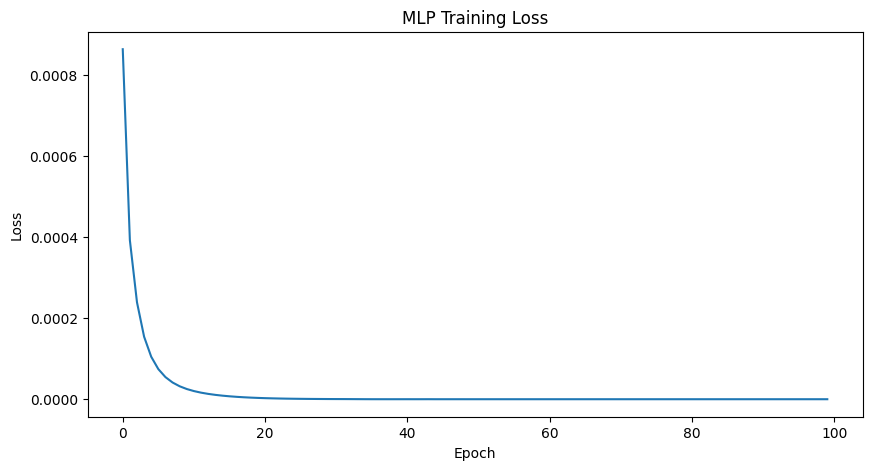

In [5]:
# Initialize MLP model and trainer
mlp_model = PermutationMLP(n, hidden_sizes)
mlp_trainer = MLPTrainer(mlp_model, mlp_config)

# Train MLP
mlp_losses = []
for epoch in tqdm(range(n_epochs), desc="Training MLP"):
    loss = mlp_trainer.train_epoch(X_train)
    mlp_losses.append(loss)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(mlp_losses)
plt.title('MLP Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Train DQN Model

Training DQN:   0%|          | 0/100 [00:00<?, ?it/s]c:\Users\zamko\Documents\permutations_RL\.venv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training DQN:  10%|█         | 10/100 [00:06<00:59,  1.51it/s]

Epoch 10, Loss: 0.0005


Training DQN:  20%|██        | 20/100 [00:13<00:53,  1.51it/s]

Epoch 20, Loss: 0.0000


Training DQN:  30%|███       | 30/100 [00:19<00:46,  1.50it/s]

Epoch 30, Loss: 0.0000


Training DQN:  40%|████      | 40/100 [00:26<00:39,  1.53it/s]

Epoch 40, Loss: 0.0000


Training DQN:  50%|█████     | 50/100 [00:33<00:36,  1.38it/s]

Epoch 50, Loss: 0.0000


Training DQN:  60%|██████    | 60/100 [00:40<00:28,  1.40it/s]

Epoch 60, Loss: 0.0000


Training DQN:  70%|███████   | 70/100 [00:47<00:20,  1.46it/s]

Epoch 70, Loss: 0.0000


Training DQN:  80%|████████  | 80/100 [00:54<00:14,  1.41it/s]

Epoch 80, Loss: 0.0000


Training DQN:  90%|█████████ | 90/100 [01:01<00:06,  1.49it/s]

Epoch 90, Loss: 0.0000


Training DQN: 100%|██████████| 100/100 [01:08<00:00,  1.46it/s]

Epoch 100, Loss: 0.0000


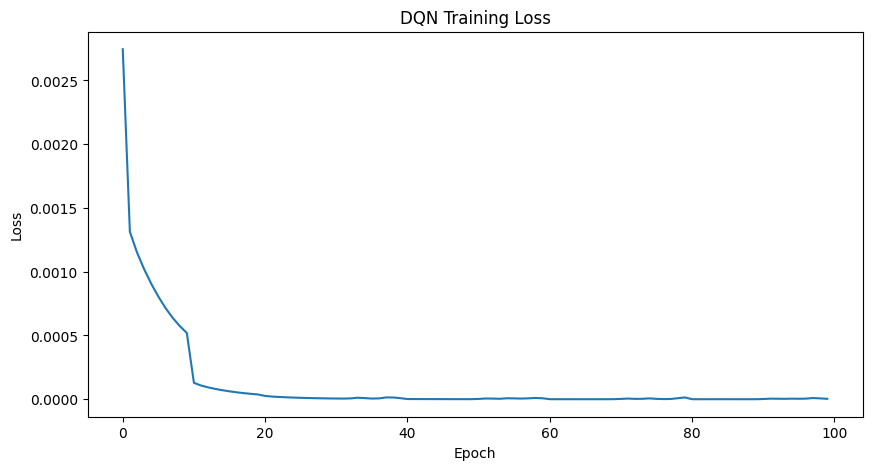

In [6]:
# Initialize DQN model and trainer
dqn_model = DQN(input_size, n, hidden_sizes)
dqn_trainer = DQNTrainer(dqn_model, dqn_config)

# Train DQN
dqn_losses = []
for epoch in tqdm(range(n_epochs), desc="Training DQN"):
    loss = dqn_trainer.train_epoch(X_train)
    dqn_losses.append(loss)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")
    
    # Update target network periodically
    if (epoch + 1) % 10 == 0:
        dqn_trainer.update_target_network()

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(dqn_losses)
plt.title('DQN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Beam Search Implementation

In [ ]:
# Test run:
s = get_unique_states(torch.arange(n_permutations_length, device = device ).view(1, -1  ).expand(10, -1 ).clone())


##################################################################################
# Beam search params
##################################################################################


#beam_width = 1000
beam_width =  CFG['beam_width']
# Coefficient to combine previous cost and new value typically 0...1 (attenuation of history) 
alpha_previous_cost_accumulation = CFG['alpha_previous_cost_accumulation']
# Maximum steps to make:
n_steps_limit = CFG['n_steps_limit']

ban_p0_p1_transposition_if_p0_lt_p1_ie_already_sorted = CFG['ban_p0_p1_transposition_if_p0_lt_p1_ie_already_sorted']
beam_search_models_or_heuristics = CFG['beam_search_models_or_heuristics']#  'model_torch'; # 'Hamming'
batch_size = CFG['batch_size']
n_steps_back_to_ban = CFG['n_beam_search_steps_back_to_ban']
beam_search_models_or_heuristics = CFG['beam_search_models_or_heuristics']#  'model_torch'; # 'Hamming', 'model_with_predict': # Catboost or Sklearn 
 


state_size = len(list_generators[0])
#X_loc = torch.tensor( [1,0] + list(np.arange(2,state_size)), device = device, dtype = dtype )
X_loc = np.array( [1,0] + list(np.arange(2,n)) )
i_position_X_in_list_generators = -1
for k in range(len(list_generators)):
    if np.all( list_generators[k] == X_loc ) : 
        i_position_X_in_list_generators = k
        break
print('i_position_X_in_list_generators:',i_position_X_in_list_generators )     
verbose = 100

print()


print('state_destination:', state_destination)
print()
print('state_start (state to be solved): ', state_start)
print()

In [ ]:
# Test beam search with trained models
from src.search.beam_search import BeamSearch

# Initialize beam search
beam_searcher = BeamSearch(
    model=mlp_model,  # We'll test both models
    device='cuda' if torch.cuda.is_available() else 'cpu',
    batch_size=16384,
    dtype=torch.long
)

# Generate a test permutation
test_state = torch.randperm(n)
print("Test state to solve:", test_state.tolist())

# Define generators for adjacent swaps
generators = []
for i in range(n-1):
    generator = list(range(n))
    generator[i], generator[i+1] = generator[i+1], generator[i]
    generators.append(generator)

# Test MLP model
print("\nTesting MLP model...")
mlp_result = beam_searcher.search(
    start_state=test_state,
    generators=generators,
    beam_width=100,
    n_steps_limit=50,
    verbose=True
)

# Update beam searcher with DQN model
beam_searcher.model = dqn_model

# Test DQN model
print("\nTesting DQN model...")
dqn_result = beam_searcher.search(
    start_state=test_state,
    generators=generators,
    beam_width=100,
    n_steps_limit=50,
    verbose=True
)

# Print results
def print_result(name, result):
    if result.success:
        print(f"\n{name} found solution in {result.steps_taken} steps!")
        print("Solution path:")
        for i, state in enumerate(result.path):
            print(f"Step {i}: {state.tolist()}")
    else:
        print(f"\n{name} failed to find solution within step limit")

print_result("MLP", mlp_result)
print_result("DQN", dqn_result)

# Visualize solution paths
def plot_solution_path(path, title):
    if not path:
        return
        
    plt.figure(figsize=(12, 6))
    steps = len(path)
    distances = [torch.sum(state != torch.arange(len(state))).item() for state in path]
    
    plt.plot(range(steps), distances, 'b-', marker='o')
    plt.title(title)
    plt.xlabel('Step')
    plt.ylabel('Distance from sorted state')
    plt.grid(True)
    plt.show()

if mlp_result.success:
    plot_solution_path(mlp_result.path, "MLP Solution Path")
if dqn_result.success:
    plot_solution_path(dqn_result.path, "DQN Solution Path")